In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import arcgis
import arcgis.geoanalytics
from arcgis.gis import GIS

from arcgis.geoanalytics.summarize_data import aggregate_points, describe_dataset
from arcgis.geoanalytics.analyze_patterns import calculate_density, find_hot_spots
from arcgis.geoanalytics.manage_data import clip_layer, run_python_script

In [2]:
gis = GIS('https://ndhagsb01.esri.com/portal', 
          'admin', 
          'esri.agp2', 
          profile="your_enterprise_portal", verify_cert=False)

In [3]:
arcgis.geoanalytics.is_supported()

True

In [4]:
bigdata_datastore_manager = arcgis.geoanalytics.get_datastores()
bigdata_datastore_manager

<DatastoreManager for https://ndhga01.esri.com:6443/arcgis/admin>

In [5]:
data_item = bigdata_datastore_manager.add_bigdata("air_quality_2019", r"\\DELDEVD014\store")

Created Big Data file share for air_quality_2019


In [6]:
bigdata_fileshares = bigdata_datastore_manager.search()
bigdata_fileshares

[<Datastore title:"/bigDataFileShares/adhoc" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/air_quality_2019" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/AzureBlob_inputs" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/AzureDataLake_inputs" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/createSpaceTimeCube" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/DataLanguages" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/findPointClusters" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ForestAndRegression" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ga-server-demo-data-bdfs" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/geoanalytics-performance-testing-data" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/geoanalytics-performance-testing-data-out" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/geocodeTe

In [7]:
file_share_folder = bigdata_fileshares[1]

In [8]:
manifest = file_share_folder.manifest
manifest

{'datasets': [{'name': 'air_quality',
   'format': {'quoteChar': '"',
    'fieldDelimiter': ',',
    'hasHeaderRow': True,
    'encoding': 'UTF-8',
    'escapeChar': '"',
    'recordTerminator': '\n',
    'type': 'delimited',
    'extension': 'csv'},
   'schema': {'fields': [{'name': 'State Code',
      'type': 'esriFieldTypeBigInteger'},
     {'name': 'County Code', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Site Num', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Parameter Code', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'POC', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Latitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'Longitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'Datum', 'type': 'esriFieldTypeString'},
     {'name': 'Parameter Name', 'type': 'esriFieldTypeString'},
     {'name': 'Date Local', 'type': 'esriFieldTypeString'},
     {'name': 'Time Local', 'type': 'esriFieldTypeString'},
     {'name': 'Date GMT', 'type': 'esriFieldTypeStr

In [5]:
search_result = gis.content.search("", item_type = "big data file share", max_items=40)
search_result

[<Item title:"bigDataFileShares_ChicagoCrime_2001_2020" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_ServiceCallsOrleans" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_ServiceCallsOrleans" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_ChicagoCrime" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_calls" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_air_quality_subset" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_chicago_crime" type:Big Data File Share owner:admin>,
 <Item title:"bigDataFileShares_air_quality_2019" type:Big Data File Share owner:admin>]

In [6]:
air_item = search_result[-1]

In [7]:
air_item

<Item title:"bigDataFileShares_air_quality_2019" type:Big Data File Share owner:admin>

In [8]:
air_item.layers

[<Layer url:"https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_air_quality_2019/BigDataCatalogServer/air_quality">]

In [9]:
air_lyr = air_item.layers[0]

In [16]:
description = describe_dataset(input_layer=air_lyr,
                               extent_output=True,
                               sample_size=1000,
                               output_name="Description of air quality 2019 data" + str(dt.now().microsecond),
                               return_tuple=True)

In [35]:
description = gis.content.search('Description of air quality 2019 data')[0]

In [41]:
description.layers[1]

<FeatureLayer url:"https://ndhagsb01.esri.com/gis/rest/services/Hosted/Description_of_air_quality_2019_data274232/FeatureServer/2">

In [44]:
lyr  = description.layers[1]

In [45]:
df = lyr.query(as_df=True)

In [46]:
df.to_csv()

,State_Code,County_Code,Site_Num,Parameter_Code,POC,Latitude,Longitude,Datum,Parameter_Name,Date_Local,...,Method_Type,Method_Code,Method_Name,State_Name,County_Name,Date_of_Last_Change,INSTANT_DATETIME,globalid,OBJECTID,SHAPE
0,6,19,2009,44201,1,36.634225,-120.382331,WGS84,Ozone,2018-02-24,...,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Fresno,2018-08-13,2018-02-24,{1BCC2BF0-9735-8908-772A-B50BFA99D8E3},1,"{""x"": -120.382331, ""y"": 36.634225, ""spatialRef..."
1,55,79,26,85101,3,43.060975,-87.913504,WGS84,PM10 - LC,2018-01-07,...,FEM,122,INSTRUMENT MET ONE 4 MODELS - BETA ATTENUATION,Wisconsin,Milwaukee,2018-05-07,2018-01-07,{9386030C-8A6C-C28B-0B01-A6876EEE73CE},2,"{""x"": -87.91350399999999, ""y"": 43.060975, ""spa..."
2,6,113,4,62101,2,38.534450,-121.773400,WGS84,Outdoor Temperature,2018-05-11,...,Non-FRM,59,Instrumental - Vaisala HMP 155,California,Yolo,2018-08-29,2018-05-11,{1C214561-F910-CE8F-D8EE-6EE3F6C8FD2D},3,"{""x"": -121.77340000000001, ""y"": 38.53445, ""spa..."
3,36,67,1015,64101,1,43.052350,-76.059210,WGS84,Barometric pressure,2018-12-15,...,Non-FRM,11,INSTRUMENTAL - ANEROID,New York,Onondaga,2019-02-07,2018-12-15,{B508F4A4-4FE9-287C-BCDC-1949C156EC97},4,"{""x"": -76.05921, ""y"": 43.05235, ""spatialRefere..."
4,12,95,2002,42603,1,28.596389,-81.362500,WGS84,Oxides of nitrogen (NOx),2018-12-10,...,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,Florida,Orange,2019-02-25,2018-12-10,{0CF5ABAB-7F16-391D-996F-5A664B29ABD8},5,"{""x"": -81.3625, ""y"": 28.596389, ""spatialRefere..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,113,1003,44201,1,38.661210,-121.732690,WGS84,Ozone,2018-01-08,...,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,California,Yolo,2018-04-24,2018-01-08,{797E105E-1C67-B161-223B-DC25E2C42D8F},1001,"{""x"": -121.73268999999999, ""y"": 38.66121, ""spa..."
996,6,31,1004,42601,1,36.315670,-119.643447,NAD83,Nitric oxide (NO),2018-04-15,...,FRM,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,California,Kings,2018-10-03,2018-04-15,{EE1317CF-08D6-FE43-6D93-6AFA5701E15D},1003,"{""x"": -119.643447, ""y"": 36.31567, ""spatialRefe..."
997,26,163,93,61103,1,42.385998,-83.266189,WGS84,Wind Speed - Resultant,2018-11-03,...,Non-FRM,20,INSTRUMENTAL - VECTOR SUMMATION,Michigan,Wayne,2019-03-05,2018-11-03,{4AEC34C0-A87E-49A8-CB00-547DCF585CAD},1005,"{""x"": -83.266189, ""y"": 42.385998, ""spatialRefe..."
998,34,23,11,44201,1,40.462182,-74.429439,NAD83,Ozone,2018-01-31,...,FEM,87,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,New Jersey,Middlesex,2018-05-23,2018-01-31,{905D66F0-E1D6-9CB0-A73A-F0F872796992},1007,"{""x"": -74.429439, ""y"": 40.462182, ""spatialRefe..."


In [17]:
description.output_json

{'datasetName': 'air_quality',
 'datasetSource': 'Big Data File Share - air_quality_2019',
 'recordCount': 71215888,
 'geometry': {'geometryType': 'Point',
  'sref': {'wkid': 4326},
  'countNonEmpty': 71215888,
  'countEmpty': 0,
  'spatialExtent': {'xmin': -161.767,
   'ymin': 17.967309,
   'xmax': -66.05223699999999,
   'ymax': 64.84568999999999}},
 'time': {'timeType': 'Instant',
  'countNonEmpty': 71215888,
  'countEmpty': 0,
  'temporalExtent': {'start': '2018-01-01 00:00:00.000',
   'end': '2018-12-31 00:00:00.000'}}}

In [18]:
description.sample_layer

<FeatureLayer url:"https://ndhagsb01.esri.com/gis/rest/services/Hosted/Description_of_air_quality_2019_data833628/FeatureServer/2">

In [19]:
df = description.sample_layer.query().sdf

In [30]:
df.to_csv('air_data2018')

In [29]:
df.head()

,State_Code,County_Code,Site_Num,Parameter_Code,POC,Latitude,Longitude,Datum,Parameter_Name,Date_Local,...,Method_Type,Method_Code,Method_Name,State_Name,County_Name,Date_of_Last_Change,INSTANT_DATETIME,globalid,OBJECTID,SHAPE
0,4,19,1028,61104,1,32.295150,-110.982300,WGS84,Wind Direction - Resultant,2018-09-06,...,Non-FRM,61,Instrumental - Met One Sonic Anemometer Model ...,Arizona,Pima,2018-10-22,2018-09-06,{DF0DF8D7-77B0-7BDA-B7D8-B67FC41D1D5E},1,"{""x"": -110.98230000000001, ""y"": 32.29515, ""spa..."
1,56,25,100,42602,1,42.822310,-106.365010,WGS84,Nitrogen dioxide (NO2),2018-10-03,...,FRM,99,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Wyoming,Natrona,2019-02-27,2018-10-03,{329474E0-F18F-45B2-5FCF-FC0CF801A566},2,"{""x"": -106.36501, ""y"": 42.822309999999995, ""sp..."
2,6,85,6,42603,1,37.338135,-121.849783,WGS84,Oxides of nitrogen (NOx),2018-07-23,...,FRM,74,INSTRUMENTAL - CHEMILUMINESCENCE,California,Santa Clara,2018-12-12,2018-07-23,{FA052A94-6F63-AEF0-E544-92D12C175A2C},3,"{""x"": -121.849783, ""y"": 37.338135, ""spatialRef..."
3,6,83,1013,62101,1,34.725352,-120.428717,NAD83,Outdoor Temperature,2018-10-26,...,Non-FRM,40,INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.,California,Santa Barbara,2019-02-26,2018-10-26,{2BE39662-E32A-7D58-33FA-809FE51A901A},4,"{""x"": -120.428717, ""y"": 34.725352, ""spatialRef..."
4,22,121,1,42401,1,30.500642,-91.213556,NAD83,Sulfur dioxide,2018-04-12,...,FEM,60,INSTRUMENTAL - PULSED FLUORESCENT,Louisiana,West Baton Rouge,2018-05-14,2018-04-12,{02A82E0F-819E-1CAE-B184-CCB29CB7D2BA},5,"{""x"": -91.213556, ""y"": 30.500642, ""spatialRefe..."


In [21]:
df.columns

Index(['State_Code', 'County_Code', 'Site_Num', 'Parameter_Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter_Name', 'Date_Local',
       'Time_Local', 'Date_GMT', 'Time_GMT', 'Sample_Measurement',
       'Units_of_Measure', 'MDL', 'Uncertainty', 'Qualifier', 'Method_Type',
       'Method_Code', 'Method_Name', 'State_Name', 'County_Name',
       'Date_of_Last_Change', 'INSTANT_DATETIME', 'globalid', 'OBJECTID',
       'SHAPE'],
      dtype='object')

Field Position	Field Name	Description
1

State Code

The FIPS code of the state in which the monitor resides.

2

County Code

The FIPS code of the county in which the monitor resides.

3

Site Num

A unique number within the county identifying the site.

4

Parameter Code

The AQS code corresponding to the parameter measured by the monitor.

5

POC

This is the “Parameter Occurrence Code” used to distinguish different instruments that measure the same parameter at the same site.

6

Latitude

The monitoring site’s angular distance north of the equator measured in decimal degrees.

7

Longitude

The monitoring site’s angular distance east of the prime meridian measured in decimal degrees.

8

Datum

The Datum associated with the Latitude and Longitude measures.

9

Parameter Name

The name or description assigned in AQS to the parameter measured by the monitor. Parameters may be pollutants or non-pollutants.

10

Date Local

The calendar date of the sample in Local Standard Time at the monitor.

11

Time Local

The time of day that sampling began on a 24-hour clock in Local Standard Time.

12

Date GMT

The calendar date of the sample in Greenwich Mean Time.

13

Time GMT

The time of day that sampling began on a 24-hour clock in Greenwich Mean Time.

14

Sample Measurement

The measured value in the standard units of measure for the parameter.

15

Units of Measure

The unit of measure for the parameter. QAD always returns data in the standard units for the parameter. Submitters are allowed to report data in any unit and EPA converts to a standard unit so that we may use the data in calculations.

16

MDL

The Method Detection Limit. The minimum sample concentration detectable for the monitor and method. Note: if samples are reported below this level, they may have been replaced by 1/2 the MDL.

17

Uncertainty

The total measurement uncertainty associated with a reported measurement as indicated by the reporting agency.

18

Qualifier

Sample values may have qualifiers that indicate why they are missing or that they are out of the ordinary. Types of qualifiers are: null data, exceptional event, natural events, and quality assurance. The highest ranking qualifier, if any, is described in this field.

19

Method Type

An indication of whether the method used to collect the data is a federal reference method (FRM), equivalent to a federal reference method, an approved regional method, or none of the above (non-federal reference method).

20

Method Code

An internal system code indicating the method (processes, equipment, and protocols) used in gathering and measuring the sample. The method name is in the next column.

21

Method Name

A short description of the processes, equipment, and protocols used in gathering and measuring the sample.

22

State Name

The name of the state where the monitoring site is located.

23

County Name

The name of the county where the monitoring site is located.

24

Date of Last Change

The date the last time any numeric values in this record were updated in the AQS data system.



In [21]:
m1 = gis.map('chicago')
m1

MapView(layout=Layout(height='400px', width='100%'))

In [22]:
m1.add_layer(description.sample_layer)

In [23]:
m1.zoom_to_layer(description.sample_layer)

In [40]:
def data_processsing():
    from datetime import datetime as dt
    import pyspark.sql.functions as F
    from pyspark.sql.functions import concat, col, lit
    # Load the big data file share layer into a DataFrame.
    df = layers[0]
    cols = ['Site Num', 'County Code', 'State Code', 'Date Local', 'Time Local', 'Parameter Name', 'Sample Measurement']
    df = df.select(cols)
    df = df.withColumn('Site_Num', F.lpad(df['Site Num'], 4, '0'))
    df = df.withColumn('County_Code', F.lpad(df['County Code'], 3, '0'))
    df = df.withColumn('State_Code', F.lpad(df['State Code'], 2, '0'))
    df = df.withColumn('unique_id', F.concat(F.col('State_Code'), F.col('County_Code'), F.col('Site_Num')))
#     drop_cols = ['Site_Num', 'County_Code', 'State_Code', 'Site Num', 'County Code', 'State Code']
    df = df.drop('Site_Num', 'County_Code', 'State_Code', 'Site Num', 'County Code', 'State Code')
    df = df.withColumn('datetime', concat(col("Date Local"), lit(" "), col("Time Local")))
#     drop_cols = ['Time Local', 'Date Local']
    df = df.drop('Time Local', 'Date Local')
    df = df.where(col("unique_id") == 300710010)
    # group the dataframe by TextType field and count the number of calls for each call type. 
    df = df.groupby(df['datetime'], df['unique_id']).pivot("Parameter Name").avg("Sample Measurement")

    df.write.format("webgis").save("timeseries_data" + str(dt.now().microsecond))

In [41]:
run_python_script(code=data_processsing, layers=[air_lyr])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def data_processsing():\\n    from datetime import datetime as dt\\n    import pyspark.sql.functions as F\\n    from pyspark.sql.functions import concat, col, lit\\n    # Load the big data file share layer into a DataFrame.\\n    df = layers[0]\\n    cols = [\'Site Num\', \'County Code\', \'State Code\', \'Date Local\', \'Time Local\', \'Parameter Name\', \'Sample Measurement\']\\n    df = df.select(cols)\\n    df = df.withColumn(\'Site_Num\', F.lpad(df[\'Site Num\'], 4, \'0\'))\\n    df = df.withColumn(\'County_Code\', F.lpad(df[\'County Code\'], 3, \'0\'))\\n    df = df.withColumn(\'State_Code\', F.lpad(df[\'State Code\'], 2, \'0\'))\\n    df = df.withColumn(\'unique_id\', F.concat(F.col(\'State_Code\'), F.col(\'County_Code\'), F.col(\'Site_Num\')))\\n#     drop_cols = [\'Site_Num\', \'County_Code\', \'State_Code\', \'Site Num\', \'County Code\', \'State Code\']\\n    df = df.dr

In [3]:
data = gis.content.search('timeseries_data')[0]

In [4]:
data

<Item title:"timeseries_data416228" type:Table Layer owner:admin>

In [5]:
series_data = data.tables[0]

In [9]:
df = data.tables[0].query(as_df=True)

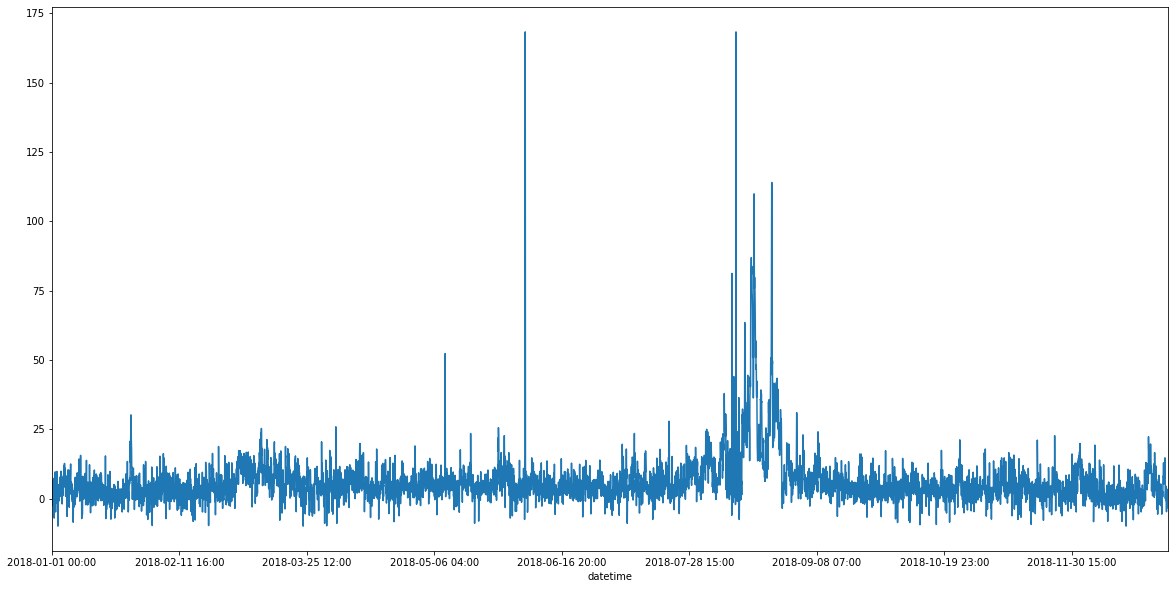

In [92]:
plt.figure(figsize=(20,10))
series.plot()
plt.show()

In [94]:
def pm_data():
    from datetime import datetime as dt
     
    df = layers[0]
    cols = ['PM2_5___Local_Conditions', 'datetime']
    df = df.select(cols)
    df = df.drop('globalid', 'OBJECTID')
    df.write.format("webgis").save("pm2_5_data" + str(dt.now().microsecond))    

In [95]:
run_python_script(code=pm_data, layers=[series_data])

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def pm_data():\\n    from datetime import datetime as dt\\n    from pyspark.sql.functions import monotonically_increasing_id \\n    df = layers[0]\\n    cols = [\'PM2_5___Local_Conditions\', \'datetime\']\\n    df = df.select(cols)\\n    df = df.drop(\'globalid\', \'OBJECTID\')\\n    df.write.format("webgis").save("pm2_5_data" + str(dt.now().microsecond))    \\n\\npm_data()" https://ndhagsb01.esri.com/gis/rest/services/Hosted/timeseries_data416228/FeatureServer/0 "{"defaultAggregationStyles": false}"'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Start Time: Mon Mar  9 12:48:04 2020'},
 {'type': 'esriJobMessageTypeInformative',
  'description': 'Using URL based GPRecordSet param: https://ndhagsb01.esri.com/gis/rest/services/Hosted/timeseries_data416228/FeatureServer/0'},
 {'type': 'esriJobMessageTypeInformative',
  'description': '{"messageCode":"BD_101028","messa

In [119]:
data = gis.content.search('pm2_5_data')[0]

In [120]:
data

<Item title:"pm2_5_data288259" type:Table Layer owner:admin>

In [132]:
pm_data = data.tables[0]

In [145]:
df = pm_data.query(as_df=True)

In [146]:
df

,OBJECTID,PM2_5___Local_Conditions,datetime,globalid
0,1,6.0,2018-04-01 06:00,{69DFA2BA-50BD-6065-2601-5197D4053E71}
1,2,7.7,2018-12-21 16:00,{9F45D805-4FC3-4A7E-D468-C5B0E4C0CBFE}
2,3,9.4,2018-07-30 22:00,{436E5305-BBCE-CB66-1FC5-E3A4F5A9ED4E}
3,4,4.2,2018-06-26 22:00,{FCD168C6-8B1C-D7BA-9B24-57D78EE85748}
4,5,6.1,2018-05-20 03:00,{9F3338BA-4279-E471-FFA7-4B9FC24DA09A}
...,...,...,...,...
8748,8910,-3.8,2018-12-28 09:00,{F71CEF9A-956F-2E23-D807-FA1874B5AF13}
8749,8916,1.6,2018-06-18 16:00,{D33AD21C-1E15-2485-4EA9-19B188D0826A}
8750,8922,-1.1,2018-09-21 06:00,{C69AE6AF-29A7-A481-44E5-32DF96011C51}
8751,8928,11.7,2018-12-26 13:00,{46DDA1CA-B717-4D8F-3B5C-328F0DF120E0}


In [147]:
from statsmodels.tsa.arima_model import ARIMA

In [148]:
df.set_index('datetime', inplace=True)

In [149]:
df.PM2_5___Local_Conditions.values

array([ 6. ,  7.7,  9.4,  4.2, ...,  1.6, -1.1, 11.7,  nan])

In [67]:
results = pd.DataFrame()
# df = df.drop(columns=['globalid', 'OBJECTID'])
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [150]:
series = df.PM2_5___Local_Conditions

In [151]:
series.fillna(method='pad', inplace=True)

In [152]:
train

array([ 6.6,  5.6,  0.1, -2.4, ..., 12.4, 18.2, 18.7, 16.5])

In [69]:
from sklearn.metrics import mean_squared_error

In [75]:
results

,yhat,obns
0,4.698488,1.8


In [78]:
test

array([ 1.8,  3.4,  8.1, 10.8, ...,  1.6, -1.1, 11.7, 11.7])

In [77]:
range(len(test))

range(0, 2977)

In [81]:
%matplotlib inline
from matplotlib import pyplot

In [153]:
series.sort_index(inplace=True)

In [104]:
24 * 365

8760

In [154]:
series.index

Index(['2018-01-01 00:00', '2018-01-01 01:00', '2018-01-01 02:00',
       '2018-01-01 03:00', '2018-01-01 04:00', '2018-01-01 05:00',
       '2018-01-01 06:00', '2018-01-01 07:00', '2018-01-01 08:00',
       '2018-01-01 09:00',
       ...
       '2018-12-31 14:00', '2018-12-31 15:00', '2018-12-31 16:00',
       '2018-12-31 17:00', '2018-12-31 18:00', '2018-12-31 19:00',
       '2018-12-31 20:00', '2018-12-31 21:00', '2018-12-31 22:00',
       '2018-12-31 23:00'],
      dtype='object', name='datetime', length=8753)

In [155]:
series.index = pd.DatetimeIndex(series.index).to_period('H')

In [156]:
series

datetime
2018-01-01 00:00    6.6
2018-01-01 01:00    5.6
2018-01-01 02:00    0.1
2018-01-01 03:00   -2.4
2018-01-01 04:00   -2.2
                   ... 
2018-12-31 19:00    2.0
2018-12-31 20:00    0.5
2018-12-31 21:00    2.8
2018-12-31 22:00   -3.3
2018-12-31 23:00    0.0
Freq: H, Name: PM2_5___Local_Conditions, Length: 8753, dtype: float64

In [157]:
series

datetime
2018-01-01 00:00    6.6
2018-01-01 01:00    5.6
2018-01-01 02:00    0.1
2018-01-01 03:00   -2.4
2018-01-01 04:00   -2.2
                   ... 
2018-12-31 19:00    2.0
2018-12-31 20:00    0.5
2018-12-31 21:00    2.8
2018-12-31 22:00   -3.3
2018-12-31 23:00    0.0
Freq: H, Name: PM2_5___Local_Conditions, Length: 8753, dtype: float64

In [107]:
series.index.values

array(['2018-01-01 00:00', '2018-01-01 01:00', '2018-01-01 02:00', '2018-01-01 03:00', ..., '2018-12-31 20:00',
       '2018-12-31 21:00', '2018-12-31 22:00', '2018-12-31 23:00'], dtype=object)

In [ ]:
pd.DatetimeIndex(series.index.values, series.index.inferred_type)

In [94]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D.PM2_5___Local_Conditions   No. Observations:                 8752
Model:                         ARIMA(5, 1, 0)   Log Likelihood              -26424.944
Method:                               css-mle   S.D. of innovations              4.955
Date:                        Wed, 11 Mar 2020   AIC                          52863.889
Time:                                15:14:23   BIC                          52913.428
Sample:                                     1   HQIC                         52880.769
                                                                                      
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0004      0.023     -0.018      0.985      -0.045       0.044
ar.L1.D.PM2_5___Local_Conditions    -0.5063      0.011    -47.594      0.000      -0.527      -0.485
ar.L2.D.PM2_5___Local_Conditions    -0.3570      0.012    -30.182      0.000      -0.380      -0.334
ar.L3.D.PM2_5___Local_Conditions    -0.2244      0.012    -18.400      0.000      -0.248      -0.200
ar.L4.D.PM2_5___Local_Conditions    -0.1508      0.012    -12.746      0.000      -0.174      -0.128
ar.L5.D.PM2_5___Local_Conditions    -0.0974      0.011     -9.155      0.000      -0.118      -0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8128           -1.3190j            1.5493           -0.1621
AR.2            0.8128           +1.3190j            1.5493            0.1621
AR.3           -1.6758           -0.0000j            1.6758           -0.5000
AR.4           -0.7489           -1.4113j            1.5977           -0.3276
AR.5           -0.7489           +1.4113j            1.5977            0.3276
-----------------------------------------------------------------------------
"""

                                 ARIMA Model Results                                  
Dep. Variable:     D.PM2_5___Local_Conditions   No. Observations:                 8752
Model:                         ARIMA(5, 1, 0)   Log Likelihood              -26424.944
Method:                               css-mle   S.D. of innovations              4.955
Date:                        Wed, 11 Mar 2020   AIC                          52863.889
Time:                                15:55:37   BIC                          52913.428
Sample:                            01-01-2018   HQIC                         52880.769
                                 - 12-31-2018                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -0.0004      0.023     -0.018      0.985      -0.045       0.044
a

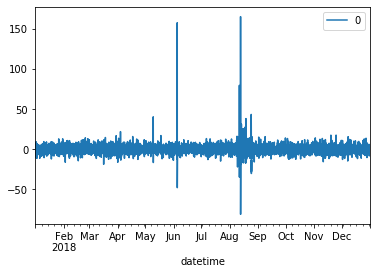

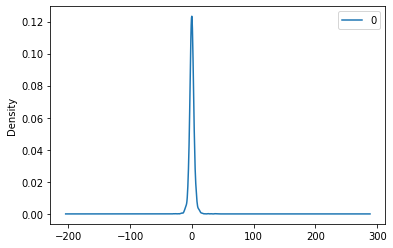

In [159]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [79]:
# for t in range(len(test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     results['yhat'] = yhat
#     results['obns'] = obs
#     print('predicted=%f, expected=%f' % (yhat, obs))
# error = mean_squared_error(test, predictions)

predicted=4.339879, expected=1.800000
predicted=3.734737, expected=3.400000
predicted=3.770057, expected=8.100000
predicted=4.795586, expected=10.800000
predicted=5.105687, expected=11.900000
predicted=6.712433, expected=14.500000
predicted=8.864496, expected=4.300000
predicted=8.390725, expected=3.500000
predicted=8.390534, expected=3.300000
predicted=7.713502, expected=12.300000
predicted=8.699343, expected=-0.600000
predicted=5.680279, expected=-1.100000
predicted=3.192869, expected=6.400000
predicted=4.219797, expected=2.600000
predicted=3.724663, expected=4.100000
predicted=3.989636, expected=0.000000
predicted=1.717658, expected=3.700000
predicted=2.689653, expected=7.300000
predicted=4.324247, expected=6.200000
predicted=4.144579, expected=3.700000
predicted=4.099330, expected=5.700000
predicted=4.512290, expected=10.100000
predicted=6.452778, expected=10.100000
predicted=7.420637, expected=1.400000
predicted=5.760712, expected=3.500000
predicted=5.550488, expected=-4.600000
pre

predicted=5.598488, expected=4.000000
predicted=4.190281, expected=6.000000
predicted=4.635580, expected=21.200000
predicted=9.035134, expected=6.400000
predicted=7.392467, expected=5.600000
predicted=8.041378, expected=6.800000
predicted=8.218498, expected=10.600000
predicted=9.571777, expected=7.000000
predicted=9.422204, expected=7.000000
predicted=7.190532, expected=6.300000
predicted=7.139611, expected=2.700000
predicted=6.402135, expected=-8.200000
predicted=3.206395, expected=6.000000
predicted=3.741295, expected=6.200000
predicted=3.643286, expected=6.300000
predicted=3.446568, expected=11.000000
predicted=4.544019, expected=-0.500000
predicted=3.059679, expected=8.200000
predicted=6.363040, expected=0.800000
predicted=4.984206, expected=1.500000
predicted=4.298756, expected=6.300000
predicted=4.739246, expected=4.700000
predicted=3.596215, expected=2.400000
predicted=3.839048, expected=1.100000
predicted=2.639823, expected=24.300000
predicted=8.217106, expected=4.200000
predic

predicted=6.660457, expected=0.400000
predicted=5.810519, expected=6.100000
predicted=6.858002, expected=2.700000
predicted=5.052435, expected=2.900000
predicted=4.067770, expected=4.100000
predicted=4.004340, expected=14.900000
predicted=5.952839, expected=8.900000
predicted=6.836665, expected=4.400000
predicted=6.136637, expected=9.300000
predicted=7.489042, expected=2.600000
predicted=7.032244, expected=3.500000
predicted=6.971281, expected=1.900000
predicted=4.834657, expected=3.800000
predicted=4.230270, expected=14.500000
predicted=6.613027, expected=3.200000
predicted=4.842649, expected=0.400000
predicted=4.168821, expected=-3.900000
predicted=2.683253, expected=7.400000
predicted=4.496391, expected=5.500000
predicted=4.672601, expected=3.200000
predicted=2.692340, expected=8.300000
predicted=3.798123, expected=-0.600000
predicted=3.030098, expected=0.600000
predicted=3.767083, expected=2.700000
predicted=3.218357, expected=19.700000
predicted=6.788809, expected=1.800000
predict

predicted=2.519771, expected=2.900000
predicted=2.074106, expected=51.000000
predicted=13.583273, expected=4.800000
predicted=10.500630, expected=10.700000
predicted=11.816947, expected=12.000000
predicted=13.671357, expected=3.600000
predicted=13.527997, expected=4.900000
predicted=13.788800, expected=7.900000
predicted=7.337399, expected=4.300000
predicted=7.059637, expected=4.100000
predicted=5.972482, expected=31.100000
predicted=10.956021, expected=19.400000
predicted=12.663538, expected=33.500000
predicted=18.023906, expected=4.500000
predicted=15.207323, expected=20.400000
predicted=18.832762, expected=5.400000
predicted=18.016416, expected=4.200000
predicted=13.813393, expected=2.000000
predicted=10.866248, expected=4.400000
predicted=6.641599, expected=0.700000
predicted=5.791414, expected=2.400000
predicted=3.112651, expected=4.500000
predicted=3.139874, expected=0.300000
predicted=2.248014, expected=6.300000
predicted=3.323482, expected=14.200000
predicted=5.480939, expected

C:\Users\pri10421.AVWORLD\.conda\envs\tf-py-fast-arcgis\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=5.582620, expected=6.700000
predicted=6.508557, expected=9.000000
predicted=6.328570, expected=22.500000
predicted=10.566765, expected=11.800000
predicted=11.480492, expected=1.800000
predicted=10.419904, expected=4.500000
predicted=8.868946, expected=7.600000
predicted=9.382212, expected=0.400000
predicted=7.584641, expected=-5.400000
predicted=2.737956, expected=15.300000
predicted=4.815317, expected=1.100000
predicted=3.833755, expected=2.700000
predicted=3.547531, expected=3.100000
predicted=2.802729, expected=3.400000
predicted=3.381141, expected=-1.900000
predicted=3.522628, expected=1.500000
predicted=1.598042, expected=7.700000
predicted=3.127919, expected=1.800000
predicted=2.603247, expected=6.500000
predicted=3.401830, expected=7.100000
predicted=4.027247, expected=4.700000
predicted=4.894883, expected=7.000000
predicted=5.874903, expected=2.100000
predicted=4.654433, expected=10.000000
predicted=6.499495, expected=15.300000
predicted=8.313959, expected=2.200000
pr

KeyboardInterrupt: 

In [74]:
len(test)

2977

In [114]:
def model():
    from statsmodels.tsa.arima_model import ARIMA
    results = pd.DataFrame()
    df = layers[0]
    df = df.drop('globalid', 'OBJECTID')
    x = df.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(5,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        results['yhat'] = yhat
        results['obns'] = obs
        print('predicted=%f, expected=%f' % (yhat, obs))
        error = mean_squared_error(test, predictions)
    

In [ ]:
run_python_script(code=model, layers=[series_data])